<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/Copy_of_Bonn_University_EEG_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [28]:
!unzip /content/archive.zip -d /content

Archive:  /content/archive.zip
replace /content/Bonn Univeristy Dataset/F/F001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical

In [31]:
extract_path = '/content/Bonn Univeristy Dataset'

class_folders = ['Z', 'O', 'N', 'F', 'S']
class_labels = {'Z': 0, 'O': 1, 'N': 2, 'F': 3, 'S': 4}

eeg_data = []
eeg_labels = []

for class_folder in class_folders:
    class_path = os.path.join(extract_path, class_folder)
    if not os.path.exists(class_path):
        print(f"Folder not found: {class_folder}")
        continue
    for filename in os.listdir(class_path):
        if filename.lower().endswith('.txt'):
            file_path = os.path.join(class_path, filename)
            data = np.loadtxt(file_path)
            eeg_data.append(data[:4096])  # Trim/pad if needed
            eeg_labels.append(class_labels[class_folder])

eeg_data = np.array(eeg_data)
eeg_labels = np.array(eeg_labels)
print("Data shape:", eeg_data.shape)
print("Labels shape:", eeg_labels.shape)

Data shape: (500, 4096)
Labels shape: (500,)


In [32]:
eeg_data

array([[  -34.,   -21.,   -17., ...,   -85.,   -73.,   -61.],
       [  -36.,   -71.,  -120., ...,    14.,     3.,   -13.],
       [   46.,    42.,    29., ...,     7.,    36.,    60.],
       ...,
       [  308.,   367.,   413., ..., -1023.,  -557.,  -305.],
       [  340.,   353.,   400., ...,   722.,   512.,   130.],
       [  100.,   124.,   153., ...,    26.,    57.,    95.]])

In [33]:
eeg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [44]:
from scipy.signal import butter, filtfilt

In [49]:
from scipy.signal import butter, filtfilt  #filtfilt for forward and backward filtering
import numpy as np

# 1. Filter function
def bandpass_filter(data, lowcut=0.5, highcut=40.0, fs=173.61, order=5):  #oder = filter sharpness
    nyquist = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyquist
    high = highcut / nyquist

    b, a = butter(order, [low, high], btype='band')  # Bandpass filter design
    filtered_data = filtfilt(b, a, data)             # Apply filter
    return filtered_data

In [50]:
raw_eeg = eeg_data.copy()  # Before filtering

# Filtering
filtered_eeg = []
for signal in raw_eeg:
    filtered = bandpass_filter(signal)
    filtered_eeg.append(filtered)
eeg_data = np.array(filtered_eeg)


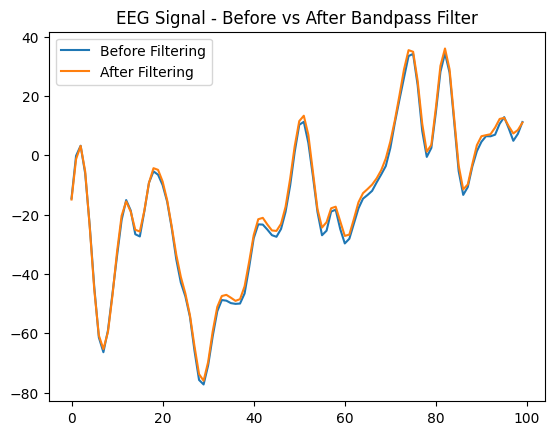

In [55]:
import matplotlib.pyplot as plt

plt.plot(raw_eeg[0][:100], label='Before Filtering')
plt.plot(filtered_eeg[0][:100], label='After Filtering')
plt.legend()
plt.title('EEG Signal - Before vs After Bandpass Filter')
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

original_signal = eeg_data[0]

scaler = MinMaxScaler(feature_range=(0, 1))
reshaped = original_signal.reshape(-1, 1)
normalized = scaler.fit_transform(reshaped).flatten()

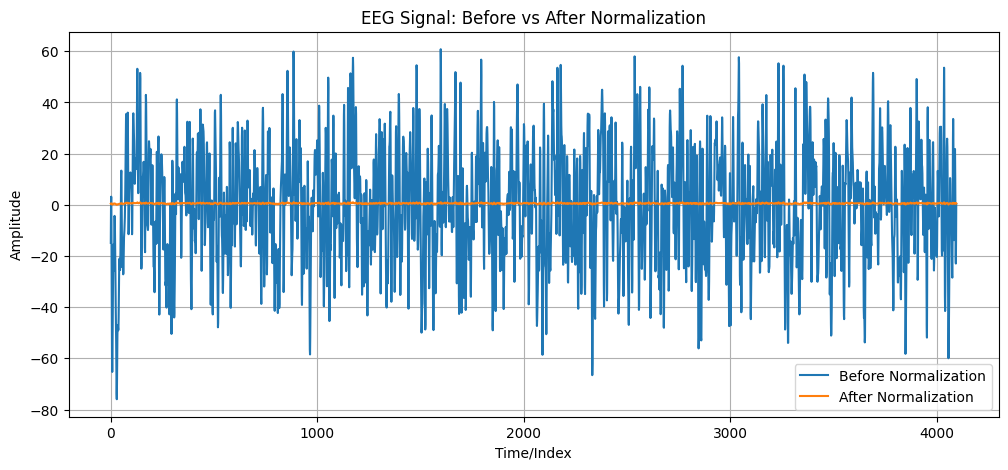

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.plot(original_signal, label='Before Normalization')
plt.plot(normalized, label='After Normalization')

plt.title("EEG Signal: Before vs After Normalization")
plt.xlabel("Time/Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
eeg_data_reshaped = eeg_data.reshape(eeg_data.shape[0], 2048, 2)
print("Reshaped EEG data:", eeg_data_reshaped.shape)

Reshaped EEG data: (500, 2048, 2)


In [62]:
eeg_labels_cat = to_categorical(eeg_labels, num_classes=5)

In [68]:
print("Before:", eeg_labels[:5])
print("After:", eeg_labels_cat[:5])

Before: [0 0 0 0 0]
After: [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    eeg_data_reshaped, eeg_labels_cat, test_size=0.2, random_state=42, stratify=eeg_labels
)

In [64]:
model = Sequential([
    LSTM(80, return_sequences=True, input_shape=(2048, 2)),  # LSTM Layer (80 cells)
    Dense(50, activation='relu'),                             # Fully Connected Layer (50 units)
    GlobalAveragePooling1D(),                                 # Average Pooling
    Dense(5, activation='softmax')                            # Output Layer (5 classes)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 2048, 80)       │        26,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048, 50)       │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,865 (120.57 KB)

 Trainable params: 30,865 (120.57 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.1)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2677 - loss: 1.5979 - val_accuracy: 0.4000 - val_loss: 1.4796
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5850 - loss: 1.4043 - val_accuracy: 0.5750 - val_loss: 1.3195
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6880 - loss: 1.2474 - val_accuracy: 0.7000 - val_loss: 1.1386
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6353 - loss: 1.0542 - val_accuracy: 0.6250 - val_loss: 0.9419
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6795 - loss: 0.8783 - val_accuracy: 0.6250 - val_loss: 0.7824
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7405 - loss: 0.7049 - val_accuracy: 0.7000 - val_loss: 0.6690
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6908 - loss: 0.6593 - val_accuracy: 0.6500 - val_loss: 0.6340
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6800 - loss: 0.6588 - val_accuracy: 0.5750 - val_loss:

In [66]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.7498 - loss: 0.4998

Test Accuracy: 76.00%
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       1.00      0.70      0.82        20
           2       0.57      0.60      0.59        20
           3       0.58      0.55      0.56        20
           4       1.00      1.00      1.00        20

    accuracy                           0.76       100
   macro avg       0.78      0.76      0.76       100
weighted avg       0.78      0.76      0.76       100



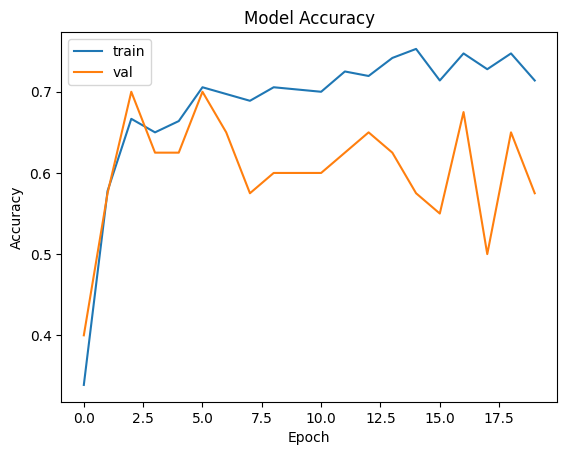

In [67]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()